# **Weekly sales prediction for Wallmart using different models and comapring them**

## **Problem Statement**

We have the sales data for 45 different wallmart stores and we are trying to predict the weekly sales of different stores based on variables such as store number, date, temperature, fuel price, unemployment rate etc.

We have used all the different regression machine learning techniques and used the best model along with its hyperparameter tuning for the prediction.

A demo for deployment by taking user-input is also shown in the end of the project for future prediction using the model



## **OBJECTIVE**
Understand the dataset and features

Use suitable Data Preprocessing and Feature Selection/Engineering Methods

Fine tune the model and hyper parameters and Finalise the Model

Make the model deployment-ready by giving User-Input provision

## **VARIABLES IN THE DATASET**
This datset contains data for the weekly sales prediction for one of the leading retail store, Walmart. There are sales data available for 45 stores of Walmart.

**Store** - the store number

**Date** - the week of sales

**Weekly_Sales** - sales for the given store

**Holiday_Flag** - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week

**Temperature** - Temperature on the day of sale

**Fuel_Price** - Cost of fuel in the region

**CPI** – Prevailing consumer price index

**Unemployment** - Prevailing unemployment rate

Here our dependent variable or the column which we are trying to predict is Weekly sales and rest are independent variables.



In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
data = pd.read_csv('Walmart.csv')


In [28]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [29]:
data.shape

(6435, 8)

In [30]:
data.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [31]:
data['Date'] = data['Date'].astype(str)

# Convert the 'Date' column to datetime, specifying the correct format
data['Date'] = pd.to_datetime(data['Date'], format="%d-%m-%Y")

# Extract additional date information
data['Day'] = data['Date'].dt.weekday
data['Week'] = data['Date'].dt.isocalendar().week
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year


In [32]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Day             0
Week            0
Month           0
Year            0
dtype: int64

In [33]:
data.nunique()

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
Day                1
Week              52
Month             12
Year               3
dtype: int64

In [34]:
data['Store'].value_counts()

Store
1     143
24    143
26    143
27    143
28    143
29    143
30    143
31    143
32    143
33    143
34    143
35    143
36    143
37    143
38    143
39    143
40    143
41    143
42    143
43    143
44    143
25    143
23    143
2     143
22    143
3     143
4     143
5     143
6     143
7     143
8     143
9     143
10    143
11    143
12    143
13    143
14    143
15    143
16    143
17    143
18    143
19    143
20    143
21    143
45    143
Name: count, dtype: int64

In [35]:
data['Month'].value_counts()

Month
4     630
7     630
3     585
6     585
8     585
9     585
10    585
2     540
5     540
12    450
11    360
1     360
Name: count, dtype: int64

In [36]:
data['Day'].value_counts()

Day
4    6435
Name: count, dtype: int64

In [37]:
data['Year'].value_counts()

Year
2011    2340
2010    2160
2012    1935
Name: count, dtype: int64

In [38]:
data['Unemployment'].value_counts()

Unemployment
8.099    78
8.163    56
7.852    56
8.200    52
6.565    52
         ..
7.138     4
8.665     4
8.000     4
9.151     4
5.217     4
Name: count, Length: 349, dtype: int64

In [39]:
data['Holiday_Flag'].value_counts()

Holiday_Flag
0    5985
1     450
Name: count, dtype: int64

In [40]:
data['Week'].value_counts()

Week
5     135
25    135
27    135
28    135
29    135
30    135
6     135
32    135
33    135
34    135
35    135
36    135
37    135
38    135
39    135
40    135
41    135
42    135
43    135
26    135
31    135
24    135
14    135
7     135
8     135
23    135
10    135
11    135
12    135
13    135
9     135
15    135
17    135
18    135
19    135
20    135
21    135
22    135
16    135
50     90
3      90
2      90
1      90
52     90
51     90
46     90
49     90
48     90
47     90
45     90
44     90
4      90
Name: count, dtype: Int64

# **HANDLING DUPLICATE VALUES**

In [41]:
data.drop_duplicates()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Week,Month,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,4,5,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,4,6,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,4,7,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,4,8,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,4,9,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,4,39,9,2012
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,4,40,10,2012
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,4,41,10,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,4,42,10,2012


In [42]:
data.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Week,Month,Year
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.0,6435.0,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,4.0,25.818182,6.447552,2010.965035
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,4.0,1.0,1.000000,2010.000000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,4.0,14.0,4.000000,2010.000000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,4.0,26.0,6.000000,2011.000000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,4.0,38.0,9.000000,2012.000000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,4.0,52.0,12.000000,2012.000000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,0.0,14.129201,3.238308,0.797019


# **TREATING OUTLIERS**

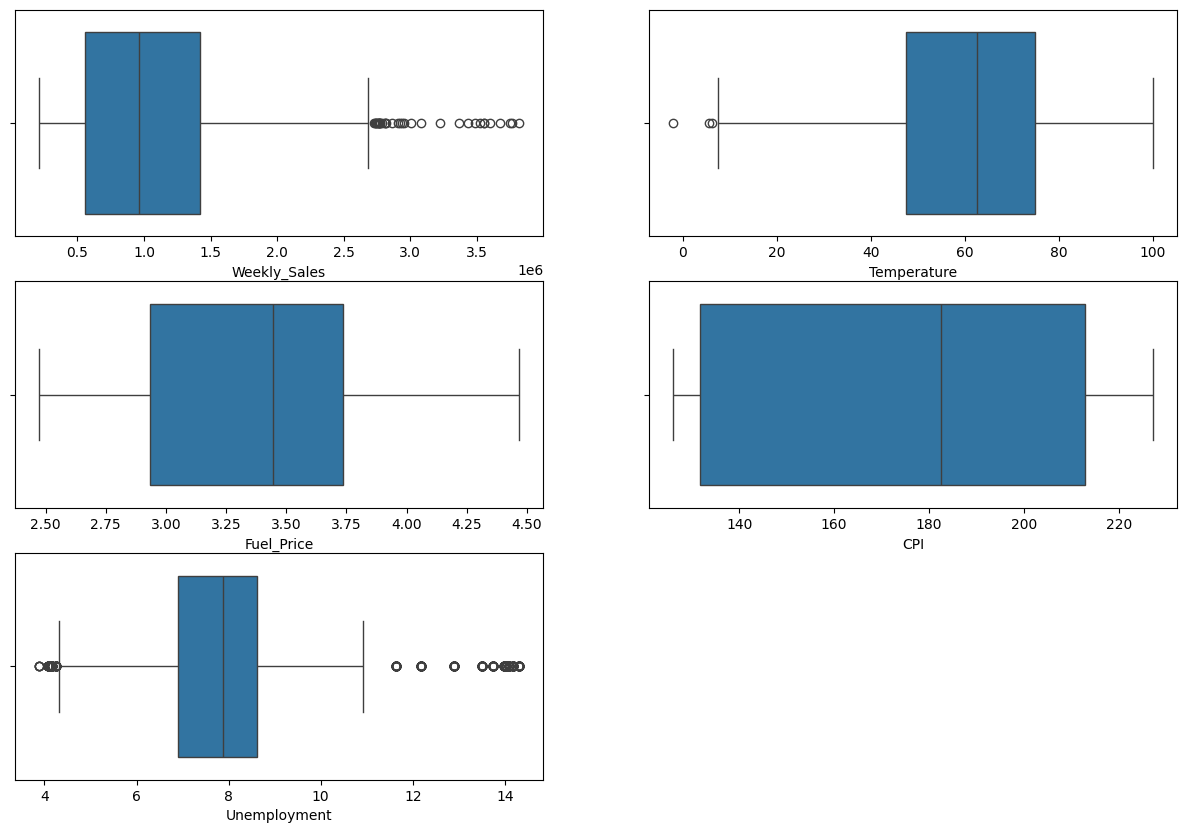

In [43]:
#checking outliers with the Boxplot

n = 1
cols =["Weekly_Sales","Temperature","Fuel_Price","CPI","Unemployment"]
plt.figure(figsize=(15,10))
for i in cols:
        if n<=5:
            plt.subplot(3,2,n);
            n+=1
            sns.boxplot(x = data[i])
            plt.xlabel(i)


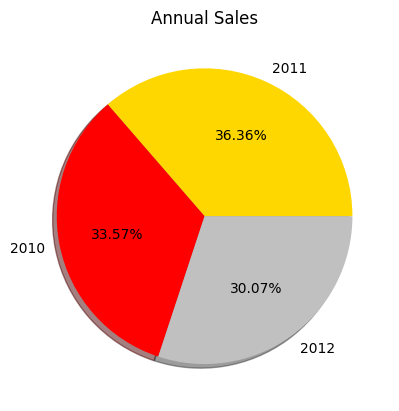

In [44]:
plt.pie(data['Year'].value_counts().values,labels =data['Year'].value_counts().index,
       autopct='%1.2f%%',shadow=True,colors=['gold','red',"silver"])
plt.title('Annual Sales')
plt.show()

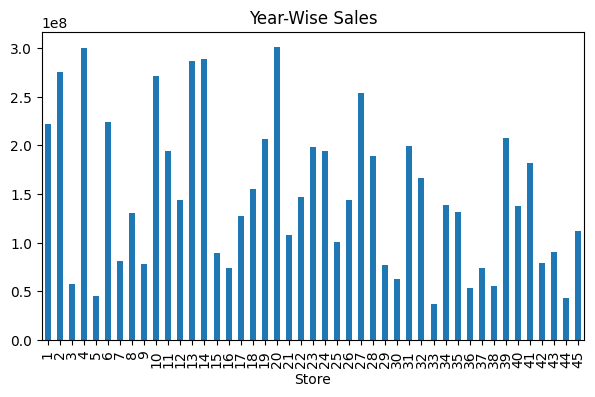

In [45]:
plt.figure(figsize=(7,4))

data.groupby('Store')['Weekly_Sales'].sum().plot(kind='bar')
plt.title('Year-Wise Sales')

plt.show()

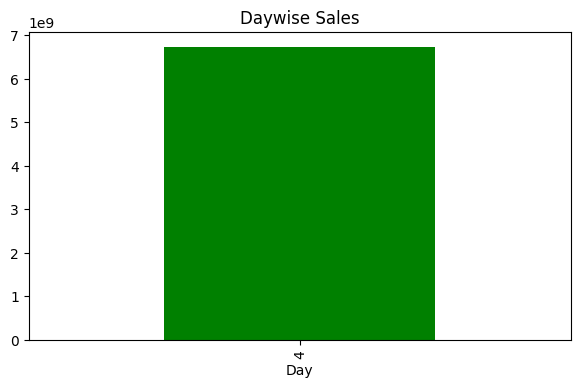

In [46]:
plt.figure(figsize=(7,4))

data.groupby(['Day'])['Weekly_Sales'].sum().plot(kind='bar',color='Green')
plt.title('Daywise Sales')

plt.show()

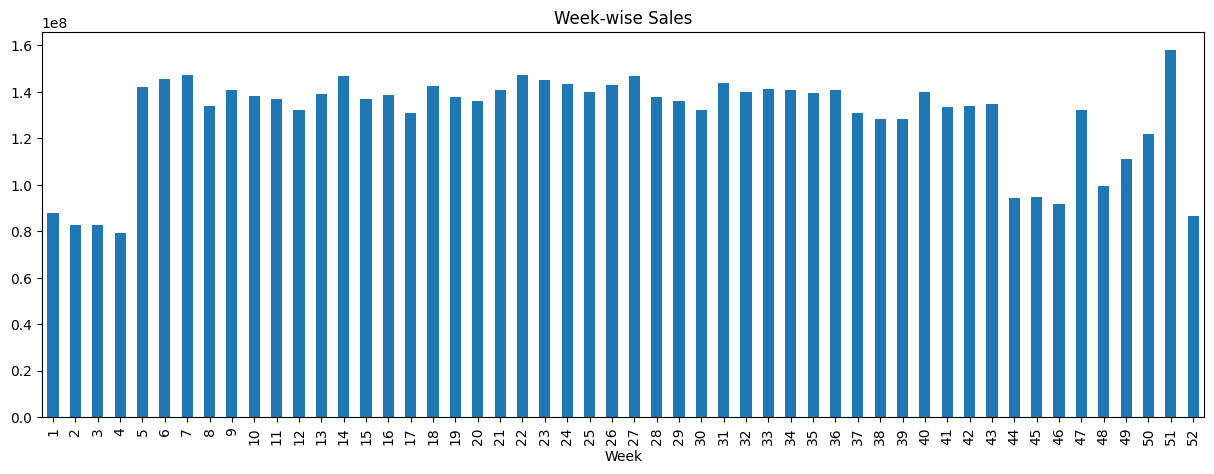

In [47]:
plt.figure(figsize=(15,5))

data.groupby(['Week'])['Weekly_Sales'].sum().plot(kind='bar')
plt.title('Week-wise Sales')

plt.show()

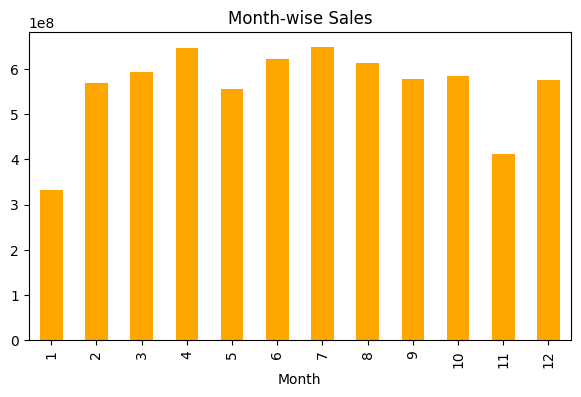

In [48]:
plt.figure(figsize=(7,4))

data.groupby('Month')['Weekly_Sales'].sum().plot(kind='bar',color='Orange')
plt.title('Month-wise Sales')

plt.show()

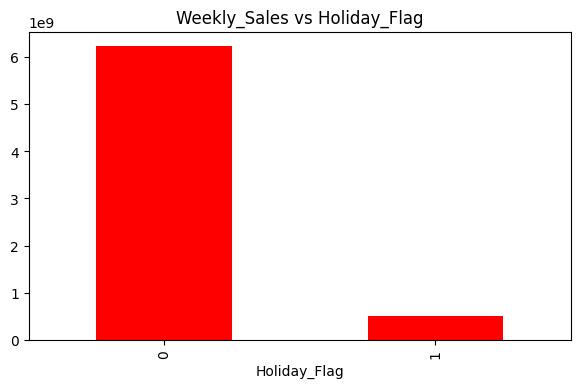

In [49]:
plt.figure(figsize=(7,4))

data.groupby('Holiday_Flag')['Weekly_Sales'].sum().plot(kind='bar',color='red')
plt.title('Weekly_Sales vs Holiday_Flag')

plt.show()

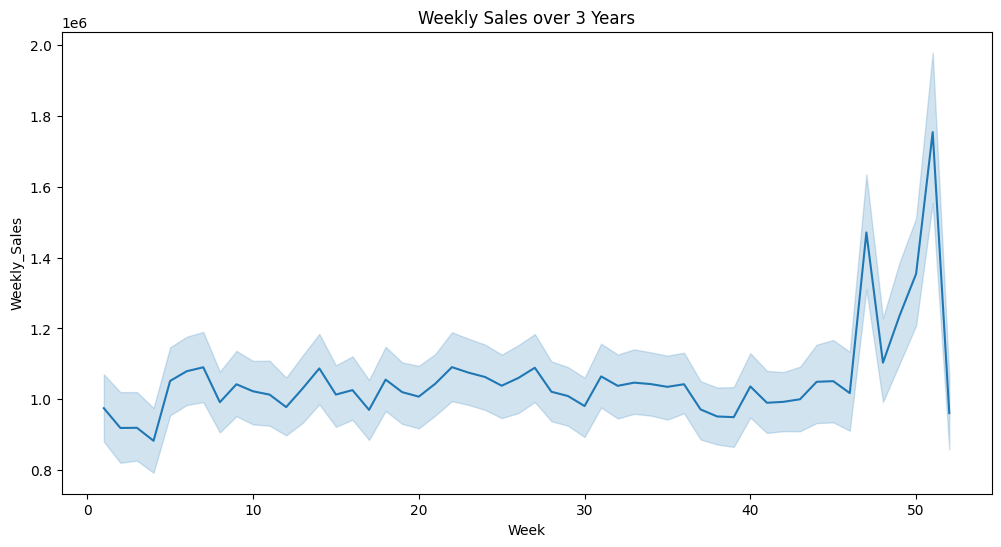

In [50]:
plt.figure(figsize=(12,6))
sns.lineplot(x=data["Week"],y=data['Weekly_Sales']);
plt.title('Weekly Sales over 3 Years');

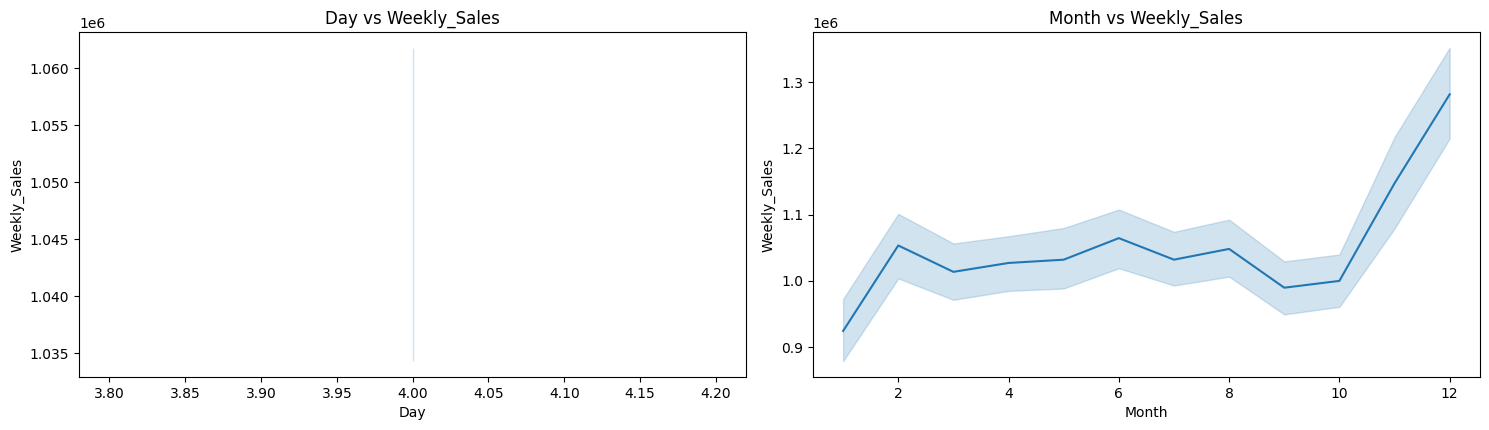

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))

plt.subplot(221)
sns.lineplot(data=data, x='Day', y='Weekly_Sales')
plt.xlabel('Day')
plt.ylabel('Weekly_Sales')
plt.title('Day vs Weekly_Sales')

plt.subplot(222)
sns.lineplot(data=data, x='Month', y='Weekly_Sales')
plt.xlabel('Month')
plt.ylabel('Weekly_Sales')
plt.title('Month vs Weekly_Sales')
plt.tight_layout()
plt.show()

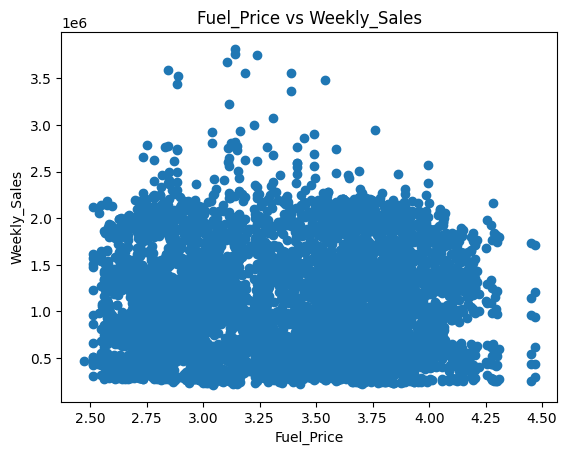

In [52]:
import matplotlib.pyplot as plt

# Sample data
x = data['Fuel_Price']
y = data['Weekly_Sales']

# Create a scatter plot
plt.scatter(x, y)

# Adding labels and title
plt.xlabel('Fuel_Price')
plt.ylabel('Weekly_Sales')
plt.title('Fuel_Price vs Weekly_Sales')

# Display the plot
plt.show()


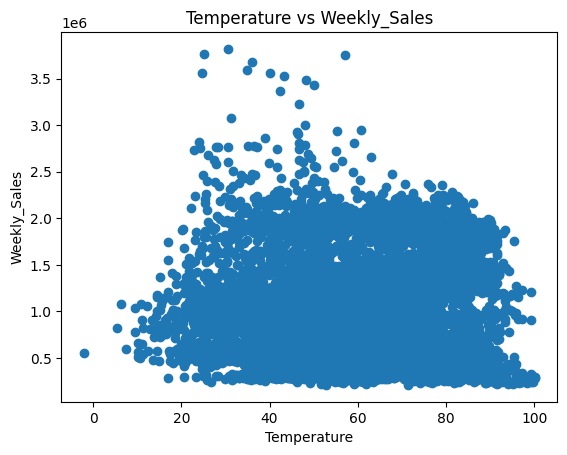

In [53]:
import matplotlib.pyplot as plt

# Sample data
x = data['Temperature']
y = data['Weekly_Sales']

# Create a scatter plot
plt.scatter(x, y)

# Adding labels and title
plt.xlabel('Temperature')
plt.ylabel('Weekly_Sales')
plt.title('Temperature vs Weekly_Sales')

# Display the plot
plt.show()

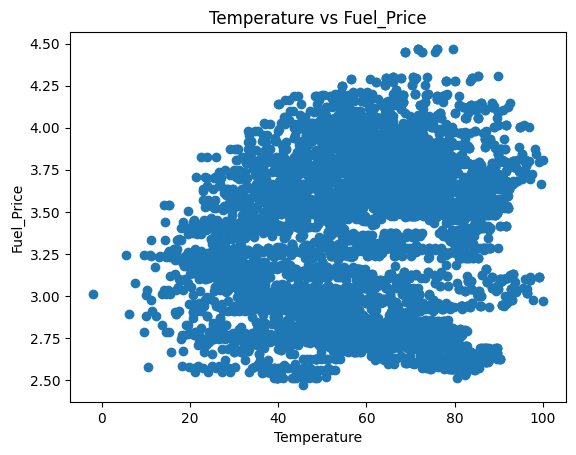

In [54]:
# Sample data
x = data['Temperature']
y = data['Fuel_Price']

# Create a scatter plot
plt.scatter(x, y)

# Adding labels and title
plt.xlabel('Temperature')
plt.ylabel('Fuel_Price')
plt.title('Temperature vs Fuel_Price')

# Display the plot
plt.show()

In [55]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Week,Month,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,4,5,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,4,6,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,4,7,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,4,8,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,4,9,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,4,39,9,2012
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,4,40,10,2012
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,4,41,10,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,4,42,10,2012


# **FEATURE ENGINEERING**

In [56]:
import pandas as pd

# Sample DataFrame 'data' containing a 'Month' column
data1= pd.DataFrame({'Month': [12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]})

# Define a function to categorize months into 'summer' or 'winter'
def categorize_season(month):
    if month in [11,12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'  # You can choose to categorize other months as 'other' or handle them differently.

# Create a new column 'Season' based on the 'Month' column
data['Season'] = data['Month'].apply(categorize_season)

# Print the updated DataFrame
print(data1)

    Month
0      12
1       1
2       2
3       3
4       4
5       5
6       6
7       7
8       8
9       9
10     10
11     11


In [57]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Week,Month,Year,Season
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,4,5,2,2010,Winter
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,4,6,2,2010,Winter
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,4,7,2,2010,Winter
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,4,8,2,2010,Winter
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,4,9,3,2010,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,4,39,9,2012,Autumn
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,4,40,10,2012,Autumn
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,4,41,10,2012,Autumn
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,4,42,10,2012,Autumn


In [59]:
data['Season'].value_counts()

Season
Summer    1800
Spring    1755
Winter    1710
Autumn    1170
Name: count, dtype: int64

In [60]:
data['Season'] = data['Season'].map({'Winter':0,'Spring':1,'Summer':2,'Autumn':3})

In [61]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Week,Month,Year,Season
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,4,5,2,2010,0
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,4,6,2,2010,0
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,4,7,2,2010,0
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,4,8,2,2010,0
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,4,9,3,2010,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,4,39,9,2012,3
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,4,40,10,2012,3
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,4,41,10,2012,3
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,4,42,10,2012,3


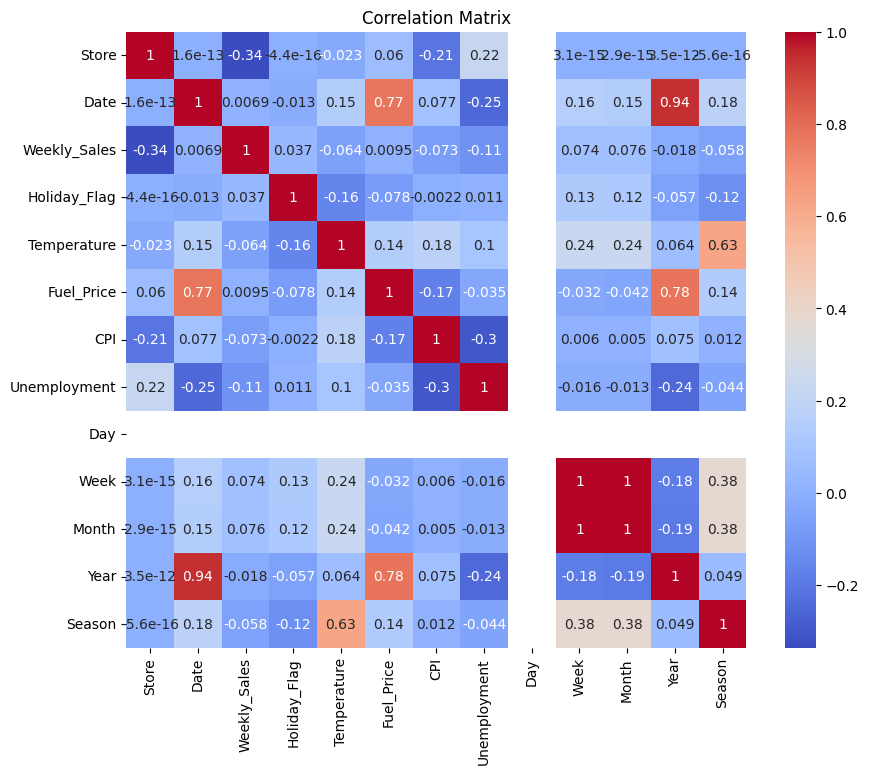

In [62]:
## Compute the correlation matrix
corr = data.corr()

# Create a heatmap of the correlation matrix
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=ax)
ax.set_title('Correlation Matrix')
plt.show()

In [67]:
data = data.drop(columns ="Date")

In [68]:
X=data.drop('Weekly_Sales', axis=1)
y=data['Weekly_Sales']

# **SPLITTING THE DATA**

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [70]:
from sklearn.preprocessing import StandardScaler
# Instantiate the StandardScaler
scaler = StandardScaler()
# Fit the scaler to the training data and transform the training and testing data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **LINEAR REGRESSION**

In [71]:
from sklearn.linear_model import LinearRegression #import
linear_model = LinearRegression(fit_intercept=True) #initialise
linear_model.fit(X_train,y_train) #fit - all magic
print(linear_model.predict(X_test))     #predict
print(y_test)

[1139624.37610962 1078650.09444129 1225423.74843674 1284123.39714763
  685733.3648712   933033.01100228  899664.86675457 1225044.8835084
  972861.9092014  1249304.40559634 1164088.26460656 1152885.01406204
 1247549.96663796 1180904.73704196  991123.84898791 1038373.59681696
 1195888.88779562 1094069.20524717  856057.14889985 1169857.14900744
  630177.34541762  813396.00409305 1672154.19197775  932859.09178586
 1215436.56319719 1636119.34942165 1131759.89774326 1506973.1352627
  858372.32601265 1042567.16768466  907146.35117025 1085151.38015986
 1265694.51264836  762687.57085812 1234413.91051096  917104.08514903
 1021737.07760052 1246599.21652841 1494663.4979948  1303329.58171246
  877351.44504106  975245.97052239  793697.7160022  1097563.060724
 1312790.67282417 1035746.11644078 1260014.23237589 1210212.47481731
 1280473.33966433  790249.435653   1402561.98251822 1227961.37143452
 1096767.05581661  704166.54492664 1263550.63384851  823652.61945523
 1405974.95855824  902043.66997778 121

In [72]:
linear_model.score(X_test, y_test)

0.16333281655467413

In [73]:
from sklearn.model_selection import cross_val_score
# synatx : cross_val_score(model, fts_train, target_train, bins).mean()
cross_val_linear_model=cross_val_score(linear_model,X_train,y_train,cv=10).mean()
cross_val_linear_model

0.14952366487218557

# **DECISION TREE REGRESSION**

**Choosing the best depth value**

In [74]:
from sklearn.tree import DecisionTreeRegressor

max_depth=np.arange(1,20)
cross_val_dt=[]
for d in max_depth:
  dt_regressor= DecisionTreeRegressor(max_depth=d, random_state=0)
  dt_regressor.fit(X_train,y_train)
  print("Depth : ", d, " train Score  : ", dt_regressor.score(X_train,y_train), "cross_val_score : ", cross_val_score(dt_regressor,X_train,y_train,cv = 10).mean())
  cross_val_dt.append(cross_val_score(dt_regressor,X_train,y_train,cv = 10).mean())

Depth :  1  train Score  :  0.1570218908182368 cross_val_score :  0.15537953548142586
Depth :  2  train Score  :  0.2526529495204106 cross_val_score :  0.24964696804538566
Depth :  3  train Score  :  0.44383958934949264 cross_val_score :  0.4402434857936943
Depth :  4  train Score  :  0.6184459542896076 cross_val_score :  0.6166042366090257
Depth :  5  train Score  :  0.7037204498693185 cross_val_score :  0.693332235107653
Depth :  6  train Score  :  0.7980824347750921 cross_val_score :  0.7769151904862961
Depth :  7  train Score  :  0.8895440327542465 cross_val_score :  0.8506008162746512
Depth :  8  train Score  :  0.937825175238436 cross_val_score :  0.9035472680709397
Depth :  9  train Score  :  0.9663425089157824 cross_val_score :  0.9335221167307488
Depth :  10  train Score  :  0.982992420085116 cross_val_score :  0.9418709294686598
Depth :  11  train Score  :  0.9886920015591519 cross_val_score :  0.9468958956618094
Depth :  12  train Score  :  0.992141943080477 cross_val_score 

In [75]:
cross_val_dt_regressor=max(cross_val_dt)
cross_val_dt_regressor

0.9468958956618094

In [76]:
print("The best depth is 11 and Cross_val_score is:",cross_val_dt_regressor)

The best depth is 11 and Cross_val_score is: 0.9468958956618094


**Implementing Decision Tree Regression**

In [77]:
dt_regressor=DecisionTreeRegressor(max_depth=11, random_state=42)
dt_regressor.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=11, random_state=42)

In [78]:
dtr = DecisionTreeRegressor(max_depth = 11, random_state = 42)
dtr.fit(X_train, y_train)
train_score = dtr.score(X_train, y_train)
test_score = dtr.score(X_test, y_test)
print(train_score)
print(test_score)

0.9886920015591519
0.9379308450771566


In [79]:
cross_val_dt_regressor=cross_val_score(dt_regressor,X_train,y_train,cv=10).mean()
cross_val_dt_regressor

0.9450244960020067

# **Feature Importance**

In [80]:
ftImp = list(zip(dt_regressor.feature_importances_, data.columns[:-1]))
imp = pd.DataFrame(ftImp, columns = ["Importance","Feature"])
imp.sort_values("Importance",ascending = False,inplace=True)
imp

,Importance,Feature
0,0.632575,Store
4,0.147651,Fuel_Price
5,0.139554,CPI
7,0.051299,Day
2,0.013878,Holiday_Flag
3,0.010868,Temperature
8,0.001790,Week
9,0.001456,Month
1,0.000621,Weekly_Sales
10,0.000309,Year


# **RANDOM FOREST REGRESSION**

**Choosing the best depth value**

In [81]:
from sklearn.ensemble import RandomForestRegressor

max_depth=np.array([2,4,8,10,12,14,16,18])
cross_val_rf=[]
for d in max_depth:
  rf_regressor=RandomForestRegressor(max_depth=d, random_state=0)
  rf_regressor.fit(X_train,y_train)
  print("Depth : ", d, "cross_val_score : ", cross_val_score(rf_regressor,X_train,y_train,cv = 10).mean())
  cross_val_rf.append(cross_val_score(rf_regressor,X_train,y_train,cv = 10).mean())


Depth :  2 cross_val_score :  0.25357682921213
Depth :  4 cross_val_score :  0.6190959778781142
Depth :  8 cross_val_score :  0.9309342609938318
Depth :  10 cross_val_score :  0.9600154361940405
Depth :  12 cross_val_score :  0.9633696996990325
Depth :  14 cross_val_score :  0.9638629457093358
Depth :  16 cross_val_score :  0.9640086775313108
Depth :  18 cross_val_score :  0.9637304905809113


In [82]:
cross_val_rf_regressor=max(cross_val_rf)
cross_val_rf_regressor

0.9640086775313108

In [83]:
print("The best depth is 16 and Cross_val_score is:",cross_val_rf_regressor)

The best depth is 16 and Cross_val_score is: 0.9640086775313108


**Implementing Random Forest Regression**

In [84]:
rf_regressor=RandomForestRegressor(max_depth=16, random_state=42)
rf_regressor.fit(X_train,y_train)

RandomForestRegressor(max_depth=16, random_state=42)

In [85]:
rfr = RandomForestRegressor( max_depth =16,random_state = 0)
rfr.fit(X_train, y_train)
print(rfr.score(X_train, y_train))
print(rfr.score(X_test, y_test))

0.9943434942292344
0.9569480333810844


In [86]:
cross_val_rf_regressor=cross_val_score(rf_regressor,X_train,y_train,cv=15).mean()
cross_val_rf_regressor

0.9642466744293041

# **K NEAREST NEIGHBOUR REGRESSION**

**Choosing the best K(Neighbor) value**

In [87]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_values=np.arange(1,50)
cross_val_knn=[]
for k in knn_values:
  knn_regressor=KNeighborsRegressor(n_neighbors=k)
  knn_regressor.fit(X_train_scaled,y_train)
  print("K value : ", k, " train score : ", knn_regressor.score(X_train_scaled,y_train)  ,"cross_val_score : ", cross_val_score(knn_regressor,X_train_scaled,y_train,cv = 10).mean())
  cross_val_knn.append(cross_val_score(knn_regressor,X_train_scaled,y_train,cv = 10).mean())


K value :  1  train score :  1.0 cross_val_score :  0.40918253657983605
K value :  2  train score :  0.8557920444911459 cross_val_score :  0.5768906659568901
K value :  3  train score :  0.8289680546456221 cross_val_score :  0.5590026156290848
K value :  4  train score :  0.7703765534379329 cross_val_score :  0.5381843959312862
K value :  5  train score :  0.7239458487900552 cross_val_score :  0.5180624870220393
K value :  6  train score :  0.6805811169195723 cross_val_score :  0.4911739386592391
K value :  7  train score :  0.6469325228222205 cross_val_score :  0.4698254289644429
K value :  8  train score :  0.6148497423088475 cross_val_score :  0.44894959775458076
K value :  9  train score :  0.5862597080051908 cross_val_score :  0.43259719201908214
K value :  10  train score :  0.561241468886778 cross_val_score :  0.41969727514019545
K value :  11  train score :  0.539165987513959 cross_val_score :  0.40621640450439445
K value :  12  train score :  0.519781788689188 cross_val_score 

In [88]:
cross_val_knn_regressor=max(cross_val_knn)
cross_val_knn_regressor

0.5768906659568901

In [89]:
print("The best K-Value is 2 and Cross_val_score is",cross_val_knn_regressor )

The best K-Value is 2 and Cross_val_score is 0.5768906659568901


# Implementing K Nearest Neighbor Regression

In [90]:
knn_regressor=KNeighborsRegressor(n_neighbors=2)
knn_regressor.fit(X_train_scaled,y_train)

KNeighborsRegressor(n_neighbors=2)

In [91]:
cross_val_knn_regressor=cross_val_score(knn_regressor,X_train_scaled,y_train,cv=15).mean()
cross_val_knn_regressor

0.5973686825294687

# **Extreme Gradient Boosting Regression**

**Choosing the best Learning Rate**

In [92]:
import xgboost as xgb

cross_val_xgb=[]
for lr in [0.01,0.05,0.08,0.1,0.2,0.25,0.3]:
  xgb_regressor= xgb.XGBRegressor(learning_rate = lr,n_estimators=100)
  xgb_regressor.fit(X_train,y_train)
  print("Learning rate : ", lr,"cross_val_score:", cross_val_score(xgb_regressor,X_train,y_train,cv = 15).mean())
  cross_val_xgb.append(cross_val_score(xgb_regressor,X_train,y_train,cv = 15).mean())


Learning rate :  0.01 cross_val_score: 0.7552518193735058
Learning rate :  0.05 cross_val_score: 0.956297690691735
Learning rate :  0.08 cross_val_score: 0.968434118728461
Learning rate :  0.1 cross_val_score: 0.972698593701442
Learning rate :  0.2 cross_val_score: 0.9775412807771511
Learning rate :  0.25 cross_val_score: 0.9780062145150605
Learning rate :  0.3 cross_val_score: 0.9785483599902256


In [93]:
cross_val_xgb_regressor=max(cross_val_xgb)
cross_val_xgb_regressor

0.9785483599902256

In [94]:
print("The best Learning rate is 0.3 and Cross_val_score is:",cross_val_xgb_regressor)


The best Learning rate is 0.3 and Cross_val_score is: 0.9785483599902256


**Implementing Extreme Gradient Boosting Regression**

In [96]:
xgb_regressor= xgb.XGBRegressor(learning_rate =0.3,n_estimators=100) # initialise the model
xgb_regressor.fit(X_train,y_train) #train the model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.25, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [98]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.3,random_state = 0)
gbr.fit(X_train, y_train)
print(gbr.score(X_train, y_train))
print(gbr.score(X_test, y_test))

0.9758236393914907
0.9685079941206006


In [99]:
cross_val_xgb_regressor=cross_val_score(xgb_regressor,X_train,y_train,cv=15).mean()
cross_val_xgb_regressor

0.9780062145150605

# **CROSS VALIDATION SCORES FOR MACHINE LEARNING MODELS**

In [100]:
print("Cross Validation Score for Linear Regression Model:",cross_val_linear_model)
print("Cross Validation Score for K-Nearest Neighbors Regression Model:",cross_val_knn_regressor)
print("Cross Validation Score for Decision Tree Regression Model: ",cross_val_dt_regressor)
print("Cross Validation Score for Random Forest Regression Model: ",cross_val_rf_regressor)
print("Cross Validation Score for Extreme-Gradient Boosting Regression Model: ",cross_val_xgb_regressor)


Cross Validation Score for Linear Regression Model: 0.14952366487218557
Cross Validation Score for K-Nearest Neighbors Regression Model: 0.5973686825294687
Cross Validation Score for Decision Tree Regression Model:  0.9450244960020067
Cross Validation Score for Random Forest Regression Model:  0.9642466744293041
Cross Validation Score for Extreme-Gradient Boosting Regression Model:  0.9780062145150605


# **R2 SCORE FOR MACHINE LEARNING MODELS**

In [101]:
from sklearn.metrics import r2_score
y_pred_lr=linear_model.predict(X_test)
y_pred_knn=knn_regressor.predict(X_test)
y_pred_dt= dt_regressor.predict(X_test)
y_pred_rf=rf_regressor.predict(X_test)
y_pred_xgb=xgb_regressor.predict(X_test)

In [102]:
R2_score_lr=r2_score(y_test,y_pred_lr)
R2_score_knn=r2_score(y_test,y_pred_knn)
R2_score_dt=r2_score(y_test,y_pred_dt)
R2_score_rf=r2_score(y_test,y_pred_rf)
R2_score_xgb=r2_score(y_test,y_pred_xgb)

In [103]:
print("R2 Score for K-Nearest Neighbors Regression Model:",R2_score_knn)
print("R2 Score for Decision Tree Regression Model: ",R2_score_dt)
print("R2 Score for Random Forest Regression Model: ",R2_score_rf)
print("R2 Score for Extreme-Gradient Boosting Regression Model: ",R2_score_xgb)

R2 Score for K-Nearest Neighbors Regression Model: 0.6378386353592314
R2 Score for Decision Tree Regression Model:  0.9379308450771566
R2 Score for Random Forest Regression Model:  0.9578354461561116
R2 Score for Extreme-Gradient Boosting Regression Model:  0.9796734507662187


# **THE BEST MODEL IS EXTREME GRADIENT BOOSTING REGRESSION : 0.9796734507662187**